# Deep Learning COde

## By OPTIMUM
***
안녕하세요 고객님~ 요청하신 작업물입니다.

제가 드린 내용이 공부에 조금이나마 도움이 되었으면 좋겠습니다!

궁금하시거나 수정 사항이 있으실 경우 말씀해주세요!

감사합니다:)

In [2]:
import math
import numpy as np
from IPython.display import Image

In [ ]:
def Sigmoid(x):
    return 1/(1+np.exp(-x))

시그모이드 함수는 로지스틱 함수라고도 불리며 변수가 0 또는 1의 이진(binary) 변수일 때 사용되는데 선형인 멀티퍼셉트론에서 비선형 값을 얻기 위해 사용되기 시작했습니다.

$\sigma(x)$ = $1\over 1 + e^{-x}$

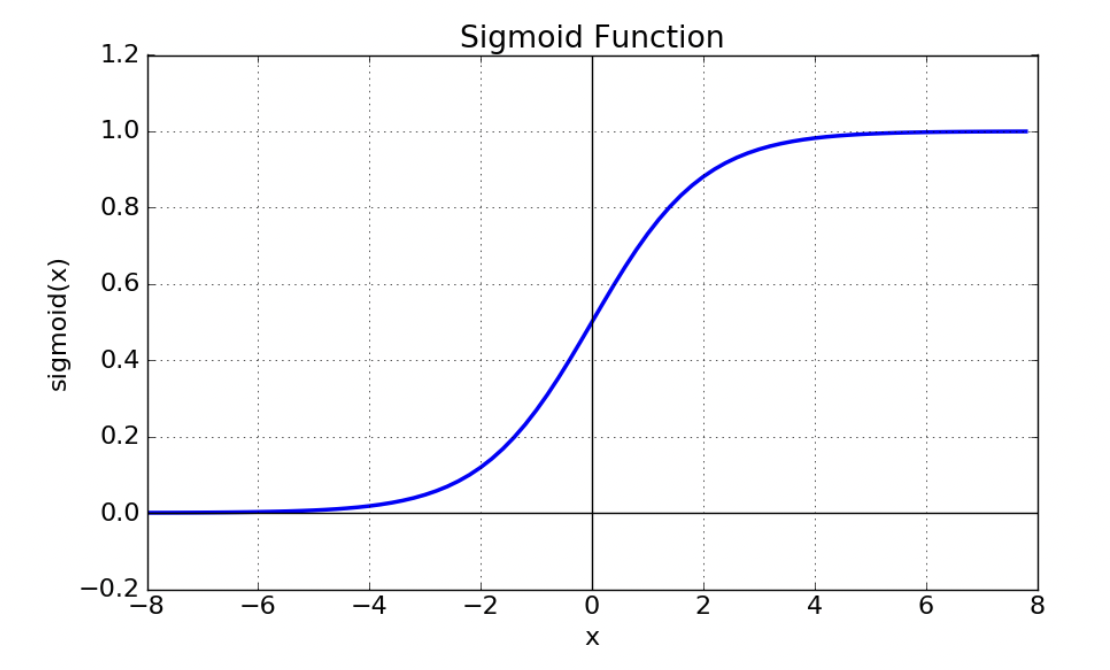

In [ ]:
Image('sigmoid.png')

In [ ]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
w1 = np.array([[-2,5,4],[3,6,3]])
b1 = np.array([2,-2,-5])
w2 = np.array([[-4],[8],[-8]])

두 값이 모두 같을 때는 1에 가까운 출력 값을 보이며 두 값이 서로 다른 경우 0에 가까운 값을 출력합니다.

In [ ]:
h = Sigmoid(np.dot(x,w1)+b1)
y = Sigmoid(np.dot(h,w2))
print(y)

[[0.06766597]
 [0.94927397]
 [0.96979454]
 [0.0542867 ]]


In [ ]:
lamda = 1
x=np.array([[0,0],[0,1],[1,0],[1,1]])
t=np.array([[0],[1],[1],[0]])

w1=2*np.random.rand(2,3)-1
b1=2*np.random.rand(1,3)-1
w2=2*np.random.rand(3,1)-1

In [ ]:
w1

array([[-0.15214139, -0.30149347, -0.68238705],
       [-0.74696506, -0.10059421, -0.62782011]])

In [ ]:
w2

array([[-0.0342271 ],
       [-0.3656363 ],
       [-0.10358674]])

In [ ]:
for i in range(0,1000):
    h=Sigmoid(np.dot(x,w1)+b1)
    y=Sigmoid(np.dot(h,w2))
    deltaY= np.multiply(y-t,np.multiply(y,(1-y)))
    temp = np.multiply(w2.transpose(),np.multiply(h,(1-h)))
    deltaH = deltaY * temp
    w2=w2-np.dot(h.transpose(),lamda*deltaY)
    w1=w1-np.dot(x.transpose(),lamda*deltaH)
    b1=b1-lamda*deltaH

In [ ]:
print (y)
print(w1)
print(w2)
print(b1)

[[0.01717842]
 [0.98169067]
 [0.98171991]
 [0.01756407]]
[[ 0.43604584 -0.36505272  0.63356223]
 [-0.73912463  0.57278879  0.56642409]]
[[-3.37006631]
 [-2.4166837 ]
 [ 5.67727367]]
[[ 1.75608986  0.64601742 -2.54806616]
 [-0.93715738 -1.79008179  1.54752484]
 [-1.49650448 -1.46526421  1.7208397 ]
 [ 1.94351999  0.71111948 -3.48295217]]


# 텐서플로우 사용

In [2]:
import tensorflow as tf

In [4]:
x = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

In [96]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

In [12]:
model = Sequential()
model.add(Dense(3, activation = 'sigmoid', input_dim = 2)) # x의 차원(컬럼 수)은 2입니다.
model.add(Dense(1, activation = 'sigmoid'))
sgd = SGD(learning_rate = 0.1) 
# optimizer='sgd'라고 지정하면 learning rate지정불가?
### 위의 질문에 대한 답은 Yes 입니다. learning_rate를 지정하고 싶으시다면 아래 코드를 참고하세요!
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer = SGD(learning_rate = 0.1), loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x, y, epochs = 50, batch_size = 4, verbose = 0) # 데이터를 4개(batch_size)씩 꺼내어 학습합니다. 데이터를 총 50회(epochs) 사용합니다.

In [15]:
model.evaluate(x, y)

1/1 [==============================] - 0s 116ms/step - loss: 0.6944 - accuracy: 0.5000


[0.6944466233253479, 0.5]

모델을 평가합니다. 첫번째 값은 loss, 두번째 값은 평가지표(정확도)의 값입니다.

In [16]:
predicted = model.predict(x) # 실제 모델로 새 데이터를 예측합니다.
print(predicted) # 예측값을 반환합니다. 마지막 Dense층에서 출력층이 1이고 활성화함수가 sigmoid이기 때문에 0과 1사이의 확률을 반환합니다.

[[0.5082642 ]
 [0.4742062 ]
 [0.50312734]
 [0.47003677]]


In [17]:
x = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')
x, y

(array([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], dtype=float32), array([[0.],
        [1.],
        [1.],
        [0.]], dtype=float32))

In [18]:
actFunc = 'sigmoid'
model = Sequential()
model.add(Dense(10, activation = actFunc, input_dim = 2))
model.add(Dense(10, activation = actFunc))
model.add(Dense(10, activation = actFunc))
model.add(Dense(10, activation = actFunc))
model.add(Dense(10, activation = actFunc))
model.add(Dense(10, activation = actFunc))
model.add(Dense(10, activation = actFunc))
model.add(Dense(1, activation = 'sigmoid'))

sigmoid 함수는 신경망 초기에 많이 사용되었지만 다음과 같은 문제점들이 존재합니다.
- Gradient Vanishing : input의 값이 커질수록 미분 값이 거의 0에 근사하게 됩니다. 이럴 경우 미분 값이 소실될 가능성이 크기 때문에 딥러닝의 학습 목표인 가중치를 갱신하는데에 치명적인 단점이 있습니다.
- 함수값 중심이 0이 아니다 : 파라미터 값들이 같은 방향이 아닌 지그재그 형태로 갱신되어 학습이 느려진다.

In [20]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [21]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy',metrics = ['accuracy'])

In [22]:
model.fit(x, y, epochs = 50, batch_size = 4, verbose = 0)

In [23]:
model.evaluate(x, y)

1/1 [==============================] - 0s 185ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931469440460205, 0.5]

In [24]:
predicted = model.predict(x)
print(predicted)

[[0.49999392]
 [0.5000004 ]
 [0.49999785]
 [0.5000039 ]]


위의 문제가 앞서 언급한 첫번째 문제점을 단적으로 보여줍니다. 층이 깊은 것은 물론 모든 활성화 함수가 sigmoid로 되어 있어 미분시 값이 소실되어 가중치 업데이트에 문제가 발생하여 궁극적으로 성능에 문제가 발생하게 됩니다.

In [26]:
#Relu 함수??
#actFunc = 'sigmoid' # 학습이 안된다.
actFunc= 'relu'
model = Sequential()
model.add(Dense(10, activation=actFunc, input_dim=2))
model.add(Dense(10, activation=actFunc))
model.add(Dense(10, activation=actFunc))
model.add(Dense(10, activation=actFunc))
model.add(Dense(10, activation=actFunc))
model.add(Dense(10, activation=actFunc))
model.add(Dense(10, activation=actFunc))
model.add(Dense(1, activation='sigmoid')) #마지막은 왜 sigmoid ?
### 마지막이 sigmoid인 이유는 XOR에서 X or O로 이진 분류에 대한 확률을 출력하기 위해서 입니다!
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 10)               

딥러닝의 활성화 함수는 sigmoid - tanh - ReLU - LeakyReLU - ELU 등으로 발전해왔으며 최근에는 ReLU 함수가 가장 일반적으로 사용됩니다.

ReLU는 $f(x)$ = $max(0,x)$의 형태를 띄며 그래프로 그리면 아래와 같습니다.

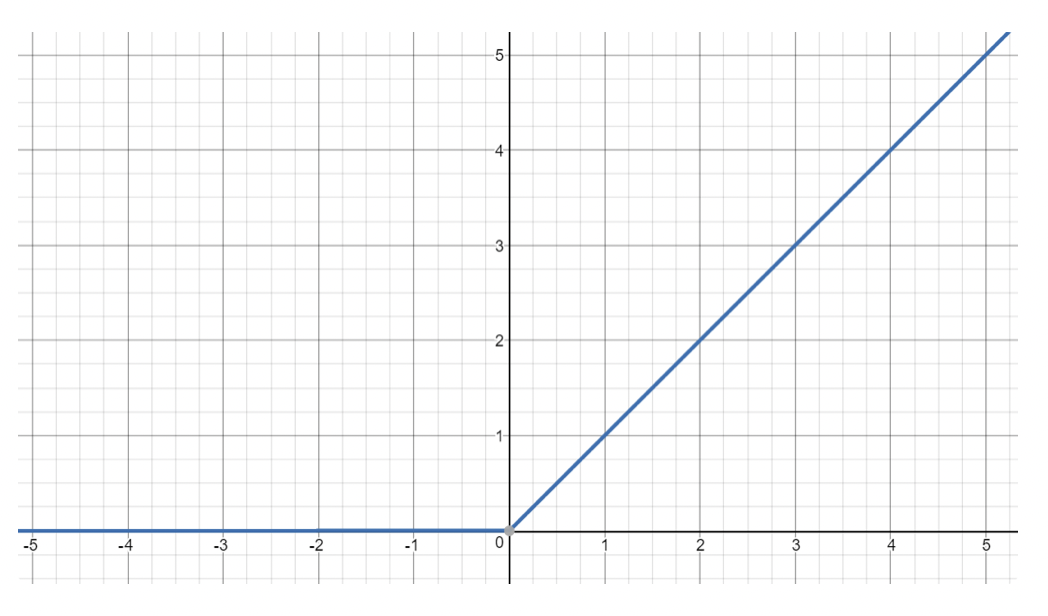

In [ ]:
Image('ReLU.png')

x가 음수인 경우 Gradient가 무조건 0이 되는 단점이 존재해 LeakyReLU가 고안되었습니다.

식은 $f(x)$ = $max(0.01x, x)$으로 x가 음수일 때 Gradient가 0.01이라는 점을 제외하면 ReLU와 동일합니다.

In [27]:
model.compile(optimizer = SGD(learning_rate=0.1),loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(x, y, epochs=10, batch_size=4, verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6833 - accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6822 - accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6824 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6820 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6811 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6809 - accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6802 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6797 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6801 - accuracy: 0.7500


In [30]:
model.evaluate(x, y)

1/1 [==============================] - 0s 20ms/step - loss: 0.6790 - accuracy: 0.7500


[0.678955614566803, 0.75]

활성화 함수를 sigmoid만 사용했을 때 보다 relu를 사용했을 때 성능이 훨씬 좋은 것을 알 수 있습니다.

In [31]:
predicted = model.predict(x)
predicted

array([[0.4859227 ],
       [0.5163083 ],
       [0.49165466],
       [0.4930845 ]], dtype=float32)

활성화 함수를 sigmoid만 적용했을 때 보다는 명확히 클래스가 구분 되는 것을 알 수 있습니다.

실제 실습을 통해서 딥러닝의 전반적인 프로세스를 확인해보겠습니다.

아래 그림은 Optimizer의 발전 현황입니다.

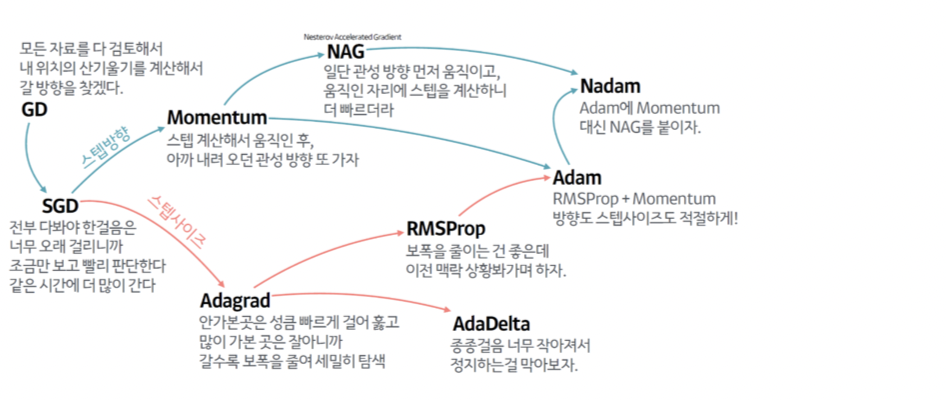

In [ ]:
Image('optimizers.png')

In [32]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


MNIST는 대표적인 딥러닝 기초 실습 데이터셋으로 0 ~ 9 사이의 숫자 이미지 데이터입니다. 

이미지의 경우 DNN이 아닌 CNN을 활용하여 모델링을 하게 되는데 CNN은 인간이 사물을 인식하는 패턴을 모방하여 만든 알고리즘입니다.

In [33]:
train_x = train_x.reshape(-1,784) 
test_x = test_x.reshape(-1,784) 

각 데이터는 28 * 28 픽셀의 배열로 되어 있습니다. 따라서 해당 데이터를 784차원(28 x 28)으로 펼쳐주는 작업을 진행합니다.

In [34]:
train_x = train_x / 255
test_x = test_x / 255

모든 머신러닝(딥러닝 포함)의 핵심은 데이터의 정규성을 만족해주는 것입니다. 일반적으로 정규화(Normalization)을 통해 정규화를 진행하지만 우선 RGB채널의 최댓값인 255으로 각 픽셀의 값을 나누겠습니다.

In [35]:
train_y_onehot = to_categorical(train_y)
test_y_onehot = to_categorical(test_y)
train_y_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

우리가 예측하고자 하는 클래스는 0 ~ 9 로 10개의 클래스입니다. 따라서 keras의 util에서 제공되는 to_categorical 메서드를 사용하여 원-핫 벡터 형태로 변환합니다.

In [37]:
#Hidden Layer 추가
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=784))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=5)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.4887 - accuracy: 0.8722
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3672 - accuracy: 0.8974
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3218 - accuracy: 0.9093
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.2932 - accuracy: 0.9171
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.2715 - accuracy: 0.9227


위에서 차원을 784차원으로 지정하고 단순히 펼친 형태의 데이터이기 때문에 첫번째 layer에 input_shape가 아닌 input_dim을 지정하고 차원의 수인 784를 입력합니다.

다중 분류(multiclass)의 문제이기 때문에 마지막 출력층은 softmax를 지정합니다.


앞선 XOR문제에서는 출력 값이 O or X의 이진(binary)분류였기 때문에 loss를 'binary_crossentropy'로 지정하였습니다. 하지만 mnist와 같은 다중 분류(multiclass)의 경우는 크게 두 가지 loss를 적용합니다.
- n(n > 2)개의 클래스를 위와 같이 원-핫 벡터로 변환한 경우 : categorical_crossentropy
- n(n > 2)개의 클래스를 그대로 숫자로 사용(위의 경우라면 0 ~ 9의 클래스) : sparse_categorical_crossentropy

경우에 따라서 다중 분류(multiclass)일 경우에도 binary_entropy를 사용할 때 성능이 좋은 경우도 있습니다.

batch_size의 경우도 딥러닝에서 튜닝해야할 파라미터 중 하나입니다. 보통 $2^n$$(n은 임의의 정수)$에 해당하는 정수를 입력하는 것이 일반적입니다.

In [48]:
# adam 옵티마이저 사용
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=784))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=5)

Epoch 1/5
600/600 [==============================] - 3s 3ms/step - loss: 0.2440 - accuracy: 0.9282
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0950 - accuracy: 0.9716
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0625 - accuracy: 0.9804
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0443 - accuracy: 0.9858
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0323 - accuracy: 0.9898


In [51]:
model.evaluate(test_x, test_y_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0745 - accuracy: 0.9786


[0.07446124404668808, 0.978600025177002]

정확도가 이전과 달리 매우 높은 것을 알 수 있습니다!

In [44]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=784, kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_44 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_45 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


kernel_initializer는 가중치 초기화 기법으로 디폴트는 random_uniform입니다. 하지만 이런 방식은 back propagation에서 미분한 gradient가 발산하거나 소실되는 문제가 발생할 수 있습니다.

최근에는 분산 조정 기반 초기화 기법이 사용되는데 확률 분포를 기반으로 추출한 값으로 가중치를 초기화 하되 이 분포의 분산을 가중치 별로 적절하게 조절해주는 것입니다. 대표적인 방식으로 Glorot, Lecun, He가 있습니다.

In [45]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=5)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.2353 - accuracy: 0.9321
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0922 - accuracy: 0.9717
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0606 - accuracy: 0.9814
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0420 - accuracy: 0.9863
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0306 - accuracy: 0.9908


In [47]:
model.evaluate(test_x, test_y_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0734 - accuracy: 0.9778


[0.07336221635341644, 0.9778000116348267]

정확도가 97.7%로 매우 높은 것을 알 수 있습니다! 

In [54]:
# adam optimizer와 He 초기화 방법, 드롭아웃 추가
model = Sequential()
model.add(Dense(256, activation='relu', kernel_initializer='he_normal', input_dim=784))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


Dropout은 과적합을 방지하기 위해 고안된 것으로 다음 층에 연결될 네트워크 중에서 Dropout만큼의 노드 비율을 넘기지 않겠다는 의미입니다. 만약에 앞선 층에서 다음 네트워크 층으로 100개의 노드가 이어질 때 Dropout이 0.3이라면 이중에서 70%인 70개만 실제로 다음 네트워크 층으로 넘어가고 나머지 30%인 30개는 사라지는 것 입니다.

In [55]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=10)

Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.3393 - accuracy: 0.8957
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1488 - accuracy: 0.9557
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1144 - accuracy: 0.9655
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0946 - accuracy: 0.9706
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0807 - accuracy: 0.9753
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0704 - accuracy: 0.9783
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0633 - accuracy: 0.9794
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0569 - accuracy: 0.9819
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0537 - accuracy: 0.9825
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0487 - accuracy: 0.9840

In [58]:
model.evaluate(test_x, test_y_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9806


[0.07132180035114288, 0.9805999994277954]

역대 최고 성능을 달성했습니다!

In [59]:
# 오버피팅 상황 만들기
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.fit(train_x, train_y_onehot, batch_size = 100, epochs=5)

Epoch 1/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2696 - accuracy: 0.9206
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1268 - accuracy: 0.9661
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.0959 - accuracy: 0.9755
Epoch 4/5
600/600 [==============================] - 5s 8ms/step - loss: 0.0767 - accuracy: 0.9800
Epoch 5/5
600/600 [==============================] - 5s 8ms/step - loss: 0.0627 - accuracy: 0.9833


In [62]:
model.evaluate(test_x, test_y_onehot)

model.save("test.h5")

313/313 [==============================] - 1s 4ms/step - loss: 0.0849 - accuracy: 0.9800


In [66]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

CNN을 활용하여 이미지 분류를 진행해보겠습니다.

In [67]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

DNN을 사용했을 때는 28 * 28 픽셀의 데이터를 1개의 벡터(784개 차원)로 확장해 사용하였는데 CNN을 활용할 경우 이미지의 픽셀 배열을 그대로 사용할 수 있습니다.

In [69]:
train_images, test_images = train_images / 255.0, test_images / 255.0

픽셀 값을 0~1 사이로 정규화합니다.

In [70]:
train_y_onehot = to_categorical(train_labels)
test_y_onehot = to_categorical(test_labels)

10개의 클래스를 원-핫 벡터로 변환합니다.

In [88]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

- 32 : 노드의 수 DNN의 인자와 동일
- (3, 3) : strides로 28 * 28 픽셀을 3 * 3의 픽셀로 나눠서 보겠다는 의미입니다. 5 * 5 픽셀을 3 * 3 픽셀로 나누어 본다면 가로로는 3 세로로도 3으로 5 * 5 픽셀이 최종적으로 3 * 3 픽셀로 축소됩니다.
- MaxPooling2D(2, 2) : 정해진 filter 크기 안에서 가장 큰 값만 뽑아낸다. n * n 픽셀의 데이터에서 2 * 2 filter 사이즈로 옮겨가면서 2 * 2픽셀 안에서 가장 큰 값만 뽑아서 픽셀을 축소시킵니다. 말로는 어려우니 아래 그림을 보겠습니다.
- Flatten : CNN을 통해서 뽑아낸 이미지의 특징을 1개의 벡터로 펼칩니다. 뒤의 DNN에 input으로 넣기 위해서 입니다.

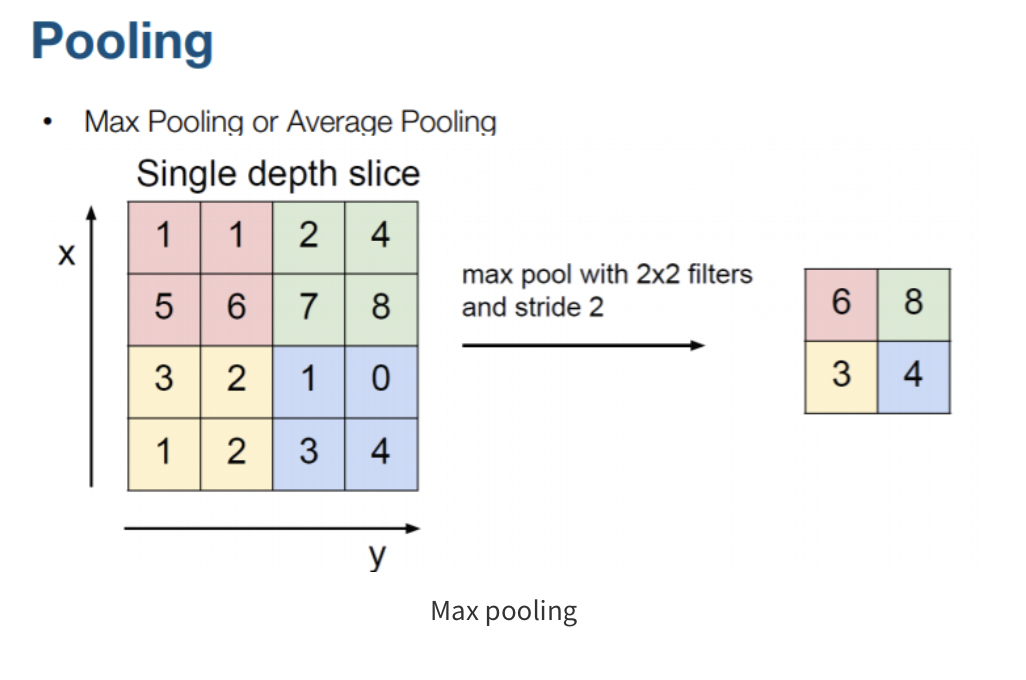

In [3]:
Image('maxpooling2d.png')

위의 그림에서 볼 수 있듯이 4 * 4 픽셀에 MaxPooling2D(2, 2)를 사용하면 위와 같은 feature map을 반환합니다.

In [72]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [73]:
model.fit(train_images, train_y_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 5ms/step - loss: 0.1641 - accuracy: 0.9508
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0551 - accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0385 - accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0238 - accuracy: 0.9926


In [74]:
test_loss, test_acc = model.evaluate(test_images,  test_y_onehot, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0315 - accuracy: 0.9901
0.9901000261306763


앞서 DNN만을 사용하여 모델링을 진행한 경우 보다 CNN을 사용했을 때 정확도가 거의 100%에 근사한 것을 알 수 있습니다!

In [83]:
print(model.layers[2].name)

conv2d_3


위의 model.summary에서 확인할 수 있습니다.

In [84]:
idx = 2
len(model.layers[idx].get_weights())

2

In [86]:
model.layers[idx].get_weights()

conv2d_1의 가중치를 확인할 수 있습니다.

In [92]:
model.layers[idx].get_weights()[0].shape, model.layers[idx].get_weights()[1].shape

((3, 3, 32, 64), (64,))

strides가 (3, 3)이고 앞서 들어온 노드가 32 출력할 노드가 64입니다.

또한 뒤의 layer로 들어갈 입력층이자 지금 레이어의 출력 노드는 64입니다.

In [94]:
h = model.layers[idx].output

In [100]:
h

<KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_5')>

2번째 layer인 conv2d_5 layer의 출력층을 h에 저장합니다.

In [95]:
train_images[0].shape, np.expand_dims(train_images[0], axis = 0).shape

((28, 28, 1), (1, 28, 28, 1))

Image 샘플을 살펴보겠습니다. 28 * 28 픽셀인 것을 확인하였습니다.

In [97]:
activation_model = Model(inputs = model.input, outputs = h)

In [98]:
activations = activation_model.predict(np.expand_dims(train_images[0], axis = 0))
activations[0].shape

(11, 11, 64)

model의 첫번째 layer를 input 층으로 앞서 저장한 h를 출력층으로 지정합니다.

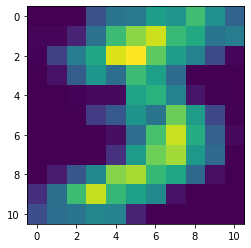

In [101]:
import matplotlib.pyplot as plt
plt.imshow(activations[0][:,:,63])
plt.show()

위 그림은 네트워크 학습 과정에서 모델이 해당 이미지의 패턴을 추출하는 과정 일부를 시각화한 것입니다.

In [102]:
feature = activations[0].sum(axis = 2)
feature.shape

(11, 11)

모델이 추출한 특징을 모두 더합니다.

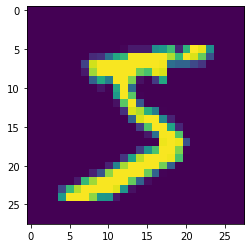

In [103]:
plt.imshow(train_images[0].reshape(28,28))
plt.show()

실제 데이터 사진입니다.

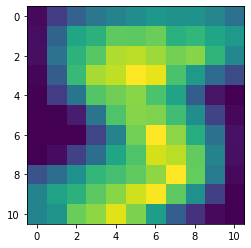

In [104]:
plt.imshow(feature)
plt.show()

모델이 추출한 특징을 시각화한 것으로 위의 실제 사진과 유사한 모습을 확인할 수 있습니다.
***

## Deep Learning Process 

- 1. Data Preprocessing - Normalization etc.
- 2. Building Network
- 3. Compiling Model
- 4. Fitting Model 
- 5. Evaluating Model
- 6. Prediction

***